<a href="https://colab.research.google.com/github/aryan5436/Comparative-analysis-between-uninformed-search-algorithms/blob/main/breast%20cancer%20image%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! kaggle datasets download "puneet6060/intel-image-classification"

 94% 327M/346M [00:01<00:00, 189MB/s]
100% 346M/346M [00:01<00:00, 214MB/s]


In [ ]:
!unzip "/content/intel-image-classification.zip"

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [ ]:
import os

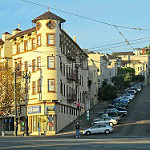

In [ ]:
from keras.preprocessing.image import load_img
img = load_img('/content/seg_train/seg_train/buildings/10056.jpg')
img

In [ ]:
img.size

(150, 150)

In [ ]:
os.listdir("/content/seg_train/seg_train")

['buildings', 'forest', 'glacier', 'sea', 'mountain', 'street']

In [ ]:
tar={'street':0,'mountain':1,'sea':2,'glacier':3,'forest':4,'buildings':5}

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
import os

In [ ]:
x=[]
y=[]
for i in os.listdir("/content/seg_train/seg_train"):
  
  path="/content/seg_train/seg_train"+"/"+i
  for j in os.listdir(path):
    path1=path+"/"+j
    img=load_img(path1,target_size=(100,100,3))
    img1=img_to_array(img)
    x.append(img1)
    y.append(tar.get(i))

In [ ]:
len(x)

14034

In [ ]:
len(y)

14034

In [ ]:
import numpy as np

In [ ]:
x=np.array(x)

In [ ]:
y=np.array(y)

In [ ]:
x.shape

(14034, 100, 100, 3)

In [ ]:
y.shape

(14034,)

In [ ]:
import tensorflow
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
y.shape

(14034, 6)

In [ ]:
y

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 1/3, random_state = 0)

In [ ]:
x_train.shape

(9356, 100, 100, 3)

In [ ]:
y_train.shape

(9356, 6)

In [ ]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
model=Sequential()
def ima():
  model=Sequential()
  model.add(Conv2D(6,(3,3),padding="same",activation="relu",input_shape=(100,100,3)))
  model.add(MaxPooling2D((2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(12, activation="relu", kernel_initializer="he_uniform"))
  model.add(Dense(6, activation="softmax"))
  opt = Adam(lr=0.01)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model 



In [ ]:
k1=ima()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
k1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [ ]:
history=k1.fit(x_train,y_train, epochs=30, batch_size=64, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
147/147 [==============================] - 36s 226ms/step - loss: 1.6368 - accuracy: 0.7998 - val_loss: 0.5070 - val_accuracy: 0.8318
Epoch 2/30
147/147 [==============================] - 31s 214ms/step - loss: 0.2624 - accuracy: 0.9021 - val_loss: 0.5554 - val_accuracy: 0.8536
Epoch 3/30
 62/147 [===========>..................] - ETA: 12s - loss: 0.1488 - accuracy: 0.9451

KeyboardInterrupt: ignored

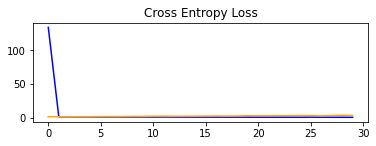

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")

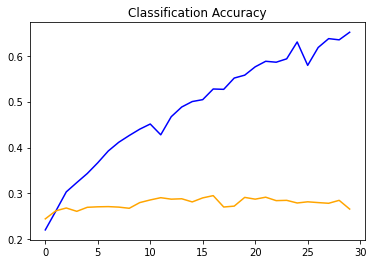

In [ ]:
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color="blue", label="train")
plt.plot(history.history["val_accuracy"], color="orange", label="test")

In [ ]:
%pwfrom keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
model=Sequential()
def ima():
  model=Sequential()
  model.add(Conv2D(6,(3,3),padding="same",activation="relu",input_shape=(100,100,3)))
  model.add(MaxPooling2D((2,2),strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(12, activation="relu", kernel_initializer="he_uniform"))
  model.add(Dense(6, activation="softmax"))
  opt = Adam(lr=0.01)
  model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
  return model 



'/content'

In [ ]:
os.chdir("/content/drive/MyDrive")

In [ ]:
os.mkdir("Intel_data")

In [ ]:
%pwd

'/content/drive/MyDrive'

In [ ]:
os.chdir("/content/drive/MyDrive/Intel_data")

In [ ]:
%pwd

'/content/drive/MyDrive/Intel_data'

In [ ]:
!unzip 